# Barplot summarizing the MAE values

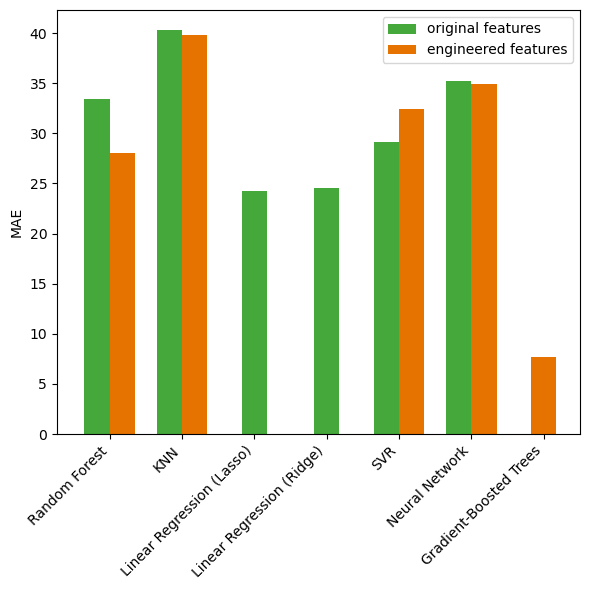

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# create data frame
data = {"Model": ["Random Forest", "Random Forest *", "KNN", "KNN *", "Linear Regression (Lasso)", "Linear Regression (Ridge)", "SVR", 
                  "SVR *", "Neural Network", "Neural Network *", "Gradient Boost Trees *"],
        "MAE": [33.39, 28.05, 40.29, 39.79, 24.25, 24.56, 29.16, 32.40, 35.25, 34.95, 7.73],
        "Base": ["Random Forest", "Random Forest", "KNN", "KNN", "Linear Regression (Lasso)", "Linear Regression (Ridge)", "SVR", "SVR", 
                 "Neural Network", "Neural Network", "Gradient-Boosted Trees"],
        "FE": [False, True, False, True, False, False, False, True, False, True, True]}

df = pd.DataFrame(data)


# define order and grouping of bars
base_order = df["Base"].drop_duplicates().tolist()

groups = {base: df[df["Base"] == base] for base in base_order}

# set up plot
fig, ax = plt.subplots(figsize=(6, 6))
x_positions = np.arange(len(groups))
bar_width = 0.35

# legend
ax.bar(0, 0, color="#44A83B", label="original features")
ax.bar(0, 0, color="#E67300", label="engineered features")

# plot bars
for i, base in enumerate(base_order):
    group = groups[base]

    if len(group) == 2:
        offsets = [-bar_width/2, bar_width/2]
    else:
        offsets = [0]

    for offset, (_, row) in zip(offsets, group.iterrows()):
        color = "#E67300" if row["FE"] else "#44A83B"
        ax.bar(i + offset, row["MAE"], width=bar_width, color=color)

# formatting
ax.set_xticks(x_positions)
ax.set_xticklabels(base_order, rotation=45, ha="right")
ax.set_ylabel("MAE")
ax.legend()

plt.tight_layout()


plt.savefig("Barplot_model_comparison")
